<a href="https://colab.research.google.com/github/QuanPhamAnh/Coursera_Capstone/blob/main/Applied_DS_IBM_Week_4_Version_2_1_(Foody_HN%26HCMC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from pandas import json_normalize
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app",timeout=None)
import re
!pip install unidecode
import unidecode
import json

     |████████████████████████████████| 245kB 6.3MB/s 


In [2]:
page = 1
city = 'ha-noi'
url = 'https://www.foody.vn/{}/nha-hang?ds=Restaurant&vt=row&st=5&c=1&page={}&categoryId=1&append=true'.format(city,page)
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Địa điểm Nhà hàng tại Hà Nội | Foody.vn
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-type"/>
  <meta content="Danh sách hơn 2,887 địa điểm Nhà hàng tại Hà Nội. Foody.vn là website #1 tại VN về tìm kiếm địa điểm, có hàng ngàn bình luận, hình ảnh" name="description"/>
  <meta content="Foody.vn là nơi chia sẻ và đánh giá địa điểm, với hàng ngàn địa điểm về ẩm thực, giải trí cùng hàng ngàn bình luận. Tham gia để chia sẻ trải nghiệm với cộng đồng" name="keywords"/>
  <meta content="app-id=1218739449" name="apple-itunes-app"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="index, follow" name="robots">
   <meta content="9F288B3B53D32225CE6A70FA2DB2BF6D" name="msvalidate.01"/>
   <link href="/favicon.ico" rel="SHORTCUT ICON">
    <meta content="Địa điểm N

In [3]:
regex = re.compile("var jsonData = .*(?:\\r\\n)")
jsondata = regex.findall(soup.text)
jsondata[0]

'var jsonData = {"photoCollectionResultCount":8703,"provinceId":218,"categoryId":1,"districtId":0,"districtName":"Hà Nội","searchUrl":"/ha-noi/nha-hang","searchDefaultUrl":"/ha-noi/dia-diem","keyword":"","viewType":"row","sortType":5,"priceMin":0,"priceMax":5000000,"districts":[{"Id":20,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Quận Ba Đình","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Ba Dinh"},{"Id":690,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Quận Bắc Từ Liêm","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Bac Tu Liem"},{"Id":21,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Quận Cầu Giấy","UrlRewriteName":null,"ResultCount":0,"Selected":false,"Min":null,"Max":null,"Children":[],"FilterType":2,"AsciiName":"Quan Cau Giay"},{"Id":22,"Avatar":null,"ParentId":0,"ParentName":null,"Name":"Quận Đống Đa","Url

In [4]:
jsondata = jsondata[0].replace('var jsonData =','').strip()
jsondata = jsondata[:-1]
results_json = json.loads(jsondata)

In [5]:
results_json

{'adItems': [],
 'allAreas': [],
 'allCategories': [],
 'allCuisines': [],
 'allDinings': [],
 'allDishCategories': [],
 'allDistricts': [],
 'allProperties': [],
 'allPurposes': [],
 'articleResultCount': 4341,
 'book': False,
 'brand': '',
 'categoryId': 1,
 'currentPage': 1,
 'districtId': 0,
 'districtName': 'Hà Nội',
 'districts': [{'AsciiName': 'Quan Ba Dinh',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
   'Id': 20,
   'Max': None,
   'Min': None,
   'Name': 'Quận Ba Đình',
   'ParentId': 0,
   'ParentName': None,
   'ResultCount': 0,
   'Selected': False,
   'UrlRewriteName': None},
  {'AsciiName': 'Quan Bac Tu Liem',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
   'Id': 690,
   'Max': None,
   'Min': None,
   'Name': 'Quận Bắc Từ Liêm',
   'ParentId': 0,
   'ParentName': None,
   'ResultCount': 0,
   'Selected': False,
   'UrlRewriteName': None},
  {'AsciiName': 'Quan Cau Giay',
   'Avatar': None,
   'Children': [],
   'FilterType': 2,
   'Id': 21,
  

In [6]:
r1 = results_json['searchItems'][0]

In [7]:
print('Name: ', r1['Name'],
      ', Address: ', r1['Address'], r1['District'],
      ', Rating: ', r1['AvgRating'],
      ', Cuisines: ', r1['Cuisines'][0]['Name'],
      ', Latitude: ', r1['Latitude'],
      ', Longitude: ', r1['Longitude'],
      ', Total Review: ', r1['TotalReview'])

Name:  Grille6 - Salad, Steak & Pasta - Hào Nam , Address:  184 Hào Nam Quận Đống Đa , Rating:  7.5 , Cuisines:  Đông Âu , Latitude:  21.028235 , Longitude:  105.827683 , Total Review:  448


In [8]:
len(r1['SubItems'])

4

In [9]:
print(r1['SubItems'][0]['Name'], r1['SubItems'][0]['Address'], r1['SubItems'][0]['City'])

Botanica - Salad, Steak & Pasta - Thái Phiên 3 Thái Phiên Hà Nội


In [10]:
r2 = results_json['searchItems'][1]
r2

{'Address': 'Tầng 1, AEON Mall Long Biên, 27 Cổ Linh',
 'AdsProviders': [],
 'AlbumUrl': '/ha-noi/food-court-aeon-mall-long-bien/album-anh',
 'AvgRating': '7.5',
 'AvgRatingOriginal': 7.482,
 'BankCards': [],
 'BookingMobileUrl': '',
 'BookingUrl': '',
 'BranchName': 'Hệ thống ',
 'BranchUrl': '',
 'Categories': [{'ASCIIName': None,
   'DetailUrl': None,
   'Id': 1,
   'Name': 'Nhà hàng',
   'NameEn': None}],
 'CategoryGroupKey': None,
 'City': 'Hà Nội',
 'Cuisines': [{'ASCIIName': None,
   'DetailUrl': '/ha-noi/dia-diem-phong-cach-quoc-te',
   'Id': 50,
   'Name': 'Quốc tế',
   'NameEn': None}],
 'DeliveryUrl': '',
 'DetailUrl': '/ha-noi/food-court-aeon-mall-long-bien',
 'Distance': None,
 'District': 'Quận Long Biên',
 'DistrictId': 27,
 'DistrictUrl': '/ha-noi/khu-vuc-quan-long-bien',
 'DocumentType': 0,
 'Floor': {'Avatar': 'https://images.foody.vn/default/s50/no-image.png',
  'Code': None,
  'Color': None,
  'Description': None,
  'DescriptionEn': None,
  'Id': 0,
  'Name': None,


In [11]:
r2['SubItems'] == []

True

In [12]:
def CreateDataframe(result):

    # create a placeholder
    temp_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])
    
    # get relevant infomation
    name = result['Name']
    address = result['Address']
    district =  result['District']
    city = result['City']
    rating = result['AvgRating']
    try:
        cuisine = result['Cuisines'][0]['Name']
    except:
        cuisine = np.nan
    latitude = result['Latitude']
    longitude = result['Longitude']
    count = result['TotalReview']

    # add data into placeholder
    temp_df = temp_df.append({'Name':name,
                              'Address':address,
                              'District':district,
                              'City':city,
                              'Rating':rating,
                              'Cuisine':cuisine,
                              'Latitude':latitude,
                              'Longitude':longitude,
                              'Total Review':count
                              }, ignore_index=True)
    
    return temp_df

In [13]:
def GetRestaurantInfo(city,page):

    # create a placeholder dataframe
    temp_restaurant_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])

    # request results page
    url = 'https://www.foody.vn/{}/nha-hang?ds=Restaurant&vt=row&st=5&c=1&page={}&categoryId=1&append=true'.format(city,page)    
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    
    # extract results from soup and load as a json
    regex = re.compile("var jsonData = .*(?:\\r\\n)")
    jsondata = regex.findall(soup.text)
    jsondata = jsondata[0].replace('var jsonData =','').strip()
    jsondata = jsondata[:-1]
    results_json = json.loads(jsondata)
    results = results_json['searchItems']

    # get relevant infomation for each restaurant from results
    results = results_json['searchItems']
    for result in results:
        temp_restaurant_df = temp_restaurant_df.append(CreateDataframe(result),ignore_index = True)
    
    # If it's a branch of restaurants, we will need to check for its subItems
        if result['SubItems'] != []:
            for i in range(len(result['SubItems'])):
                r = result['SubItems'][i]
                temp_restaurant_df = temp_restaurant_df.append(CreateDataframe(r),ignore_index = True)
    return temp_restaurant_df

In [14]:
restaurant_df = pd.DataFrame(columns = ['Name','Address','District','City','Rating','Cuisine','Latitude','Longitude','Total Review'])
cities = ['ha-noi','ho-chi-minh']

for city in cities:
    page = 1
    number_of_results = 12
    while number_of_results >= 12:
        sub_result = GetRestaurantInfo(city,page)
        number_of_results = len(sub_result)
        restaurant_df = restaurant_df.append(sub_result,ignore_index = True)
        page += 1

In [15]:
restaurant_df

,Name,Address,District,City,Rating,Cuisine,Latitude,Longitude,Total Review
0,"Grille6 - Salad, Steak & Pasta - Hào Nam",184 Hào Nam,Quận Đống Đa,Hà Nội,7.5,Đông Âu,21.028235,105.827683,448
1,"Botanica - Salad, Steak & Pasta - Thái Phiên",3 Thái Phiên,Quận Hai Bà Trưng,Hà Nội,7.4,Châu Mỹ,21.010549,105.851308,380
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",116 D4 Giảng Võ,Quận Ba Đình,Hà Nội,7.3,Pháp,21.026040,105.822366,276
3,"Grille6 - Salad, Steak & Pasta - Lê Văn Hưu",21 Lê Văn Hưu,Quận Hai Bà Trưng,Hà Nội,6.5,Món Âu,21.018009,105.853876,3
4,"Botanica Salad, Steak & Pasta - Trung Hòa",54 Trung Hòa,Quận Cầu Giấy,Hà Nội,6.1,NaN,21.015020,105.801503,2
...,...,...,...,...,...,...,...,...,...
5639,Food Court - An Đông Plaza,"18 An Dương Vương, P. 8",Quận 5,TP. HCM,5.9,Món Việt,10.757164,106.673248,2
5640,Nhà Hàng Sentosa Palace,"116A Nguyễn Hữu Thọ, P. Phước Kiển",Huyện Nhà Bè,TP. HCM,3.8,Món Việt,10.718568,106.702061,2
5641,Nhà Hàng Khách Sạn Gió Lộng - Tắc Xuất,Tắc Xuất,Huyện Cần Giờ,TP. HCM,7.3,Món Việt,10.412455,106.963489,2
5642,Nhà Hàng 86,"232 Lê Thị Hà, Ấp Chánh 1, Xã Tân Xuân",Huyện Hóc Môn,TP. HCM,8.0,Món Việt,10.881725,106.599023,2


In [16]:
restaurant_df['Total Review'] = pd.to_numeric(restaurant_df['Total Review'])
restaurant_df['Rating'].replace('_._',np.nan, inplace = True)
restaurant_df.dropna(inplace = True)
restaurant_df['Rating'] = pd.to_numeric(restaurant_df['Rating'])
restaurant_df

,Name,Address,District,City,Rating,Cuisine,Latitude,Longitude,Total Review
0,"Grille6 - Salad, Steak & Pasta - Hào Nam",184 Hào Nam,Quận Đống Đa,Hà Nội,7.5,Đông Âu,21.028235,105.827683,448
1,"Botanica - Salad, Steak & Pasta - Thái Phiên",3 Thái Phiên,Quận Hai Bà Trưng,Hà Nội,7.4,Châu Mỹ,21.010549,105.851308,380
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",116 D4 Giảng Võ,Quận Ba Đình,Hà Nội,7.3,Pháp,21.026040,105.822366,276
3,"Grille6 - Salad, Steak & Pasta - Lê Văn Hưu",21 Lê Văn Hưu,Quận Hai Bà Trưng,Hà Nội,6.5,Món Âu,21.018009,105.853876,3
5,Food Court - AEON Mall Long Biên,"Tầng 1, AEON Mall Long Biên, 27 Cổ Linh",Quận Long Biên,Hà Nội,7.5,Quốc tế,21.026996,105.898464,442
...,...,...,...,...,...,...,...,...,...
5639,Food Court - An Đông Plaza,"18 An Dương Vương, P. 8",Quận 5,TP. HCM,5.9,Món Việt,10.757164,106.673248,2
5640,Nhà Hàng Sentosa Palace,"116A Nguyễn Hữu Thọ, P. Phước Kiển",Huyện Nhà Bè,TP. HCM,3.8,Món Việt,10.718568,106.702061,2
5641,Nhà Hàng Khách Sạn Gió Lộng - Tắc Xuất,Tắc Xuất,Huyện Cần Giờ,TP. HCM,7.3,Món Việt,10.412455,106.963489,2
5642,Nhà Hàng 86,"232 Lê Thị Hà, Ấp Chánh 1, Xã Tân Xuân",Huyện Hóc Môn,TP. HCM,8.0,Món Việt,10.881725,106.599023,2


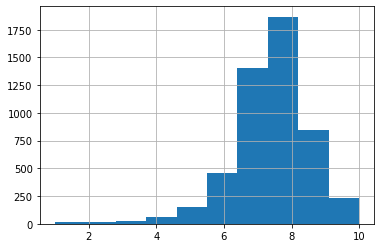

In [17]:
restaurant_df['Rating'].hist()

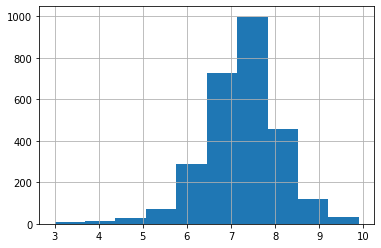

In [18]:
restaurant_df[restaurant_df['Total Review'] >= 10]['Rating'].hist()

In [19]:
filtered_restaurant_df = restaurant_df[restaurant_df['Total Review'] >= 10].drop(columns=['Address'])
filtered_restaurant_df.reset_index(drop = True, inplace = True)
filtered_restaurant_df

,Name,District,City,Rating,Cuisine,Latitude,Longitude,Total Review
0,"Grille6 - Salad, Steak & Pasta - Hào Nam",Quận Đống Đa,Hà Nội,7.5,Đông Âu,21.028235,105.827683,448
1,"Botanica - Salad, Steak & Pasta - Thái Phiên",Quận Hai Bà Trưng,Hà Nội,7.4,Châu Mỹ,21.010549,105.851308,380
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",Quận Ba Đình,Hà Nội,7.3,Pháp,21.026040,105.822366,276
3,Food Court - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.5,Quốc tế,21.026996,105.898464,442
4,Gà Rán Popeyes - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.2,Châu Mỹ,21.026516,105.900099,84
...,...,...,...,...,...,...,...,...
2734,Saigon Social Space - Nhà Hàng Á Âu,Quận 2,TP. HCM,8.4,Món Âu,10.763068,106.759421,10
2735,The Organic Bistro,Quận 1,TP. HCM,9.7,Món Việt,10.791528,106.693469,10
2736,Stirling Steaks Vietnam - Nguyễn Gia Trí,Quận Bình Thạnh,TP. HCM,8.6,Quốc tế,10.803256,106.715774,10
2737,Pizza Tonda Vietnam - Vincom Mega Mall,Quận 2,TP. HCM,6.1,Ý,10.802393,106.738793,10


In [20]:
filtered_restaurant_df['City'].value_counts()

TP. HCM    1816
Hà Nội      923
Name: City, dtype: int64

In [21]:
restaurant_df['City'].value_counts()

TP. HCM    2966
Hà Nội     2096
Name: City, dtype: int64

In [22]:
pd.pivot_table(filtered_restaurant_df, index = 'City', aggfunc={'Rating':np.mean, 'Total Review':np.sum})

,Rating,Total Review
City,,
Hà Nội,7.238137,42370
TP. HCM,7.264317,126796


In [23]:
restaurant_by_district = filtered_restaurant_df.groupby(['City','District'])['Name'].count()
print('Hà Nội \n\n', restaurant_by_district['Hà Nội'].sort_values(ascending = False), '\n\nTP.HCM \n\n', restaurant_by_district['TP. HCM'].sort_values(ascending = False))

Hà Nội 

 District
Quận Cầu Giấy        151
Quận Hoàn Kiếm       141
Quận Đống Đa         136
Quận Hai Bà Trưng    135
Quận Ba Đình         130
Quận Thanh Xuân       65
Quận Nam Từ Liêm      38
Quận Long Biên        38
Quận Tây Hồ           37
Quận Hoàng Mai        23
Quận Hà Đông          19
Quận Bắc Từ Liêm       7
Huyện Sóc Sơn          2
Huyện Đông Anh         1
Name: Name, dtype: int64 

TP.HCM 

 District
Quận 1              567
Quận 3              174
Quận 7              153
Quận Bình Thạnh     114
Quận Tân Bình       104
Quận 10             104
Quận 2               95
Quận Gò Vấp          78
Quận Phú Nhuận       76
Quận Tân Phú         70
Quận 5               70
Quận Thủ Đức         51
Quận Bình Tân        37
Quận 11              26
Quận 6               18
Quận 4               17
Quận 8               17
Quận 9               15
Quận 12              11
Huyện Hóc Môn         7
Huyện Nhà Bè          5
Huyện Bình Chánh      5
Huyện Củ Chi          2
Name: Name, dtype: int64


In [24]:
filtered_restaurant_df['Cuisine'].value_counts()

Món Việt          855
Món Nhật          455
Món Hàn           342
Châu Mỹ           172
Món Trung Hoa     144
Ý                 132
Món Âu            122
Món Á             116
Quốc tế           114
Món Thái           84
Pháp               54
Món Bắc            37
Singapore          24
Món Miền Trung     22
Món Ấn Độ          21
Món Miền Nam       20
Đức                 7
Đông Âu             4
Mỹ                  4
Trung Đông          4
Món Quảng           1
Brazil              1
Bắc Âu              1
Malaysia            1
Úc                  1
Philippines         1
Name: Cuisine, dtype: int64

In [25]:
filtered_restaurant_df['Cuisine'].replace({'Món Việt':'Vietnamese',
                                       'Món Nhật':'Japanese',
                                       'Món Hàn':'Korean',
                                       'Châu Mỹ':'American',
                                       'Món Trung Hoa':'Chinese',
                                       'Ý':'Italian',
                                       'Món Âu':'Western',
                                       'Món Á':'Asian',
                                       'Quốc tế':'International',
                                       'Món Thái':'Thai',
                                       'Pháp':'French',
                                       'Món Bắc':'Vietnamese',
                                       'Singapore':'Asian',
                                       'Món Miền Nam':'Vietnamese',
                                       'Món Miền Trung':'Vietnamese',
                                       'Món Ấn Độ':'International',
                                       'Hà Nội':'Vietnamese',
                                       'Đức':'Western',
                                       'Mỹ':'American',
                                       'Đông Âu':'Western',
                                       'Trung Đông':'International',
                                       'Malaysia':'Asian',
                                       'Úc':'Western',
                                       'Philippines':'Asian',
                                       'Món Quảng':'Vietnamese',
                                       'Brazil':'American',
                                       'Bắc Âu':'Western'
                                       }, inplace = True)
filtered_restaurant_df = filtered_restaurant_df[filtered_restaurant_df['Cuisine'] != 'Vietnamese']

In [26]:
filtered_restaurant_df['Cuisine'].value_counts()

Japanese         455
Korean           342
American         177
Chinese          144
Asian            142
International    139
Western          135
Italian          132
Thai              84
French            54
Name: Cuisine, dtype: int64

In [27]:
cuisine_df = filtered_restaurant_df[['Name','City','Cuisine']].groupby(by=['City','Cuisine']).count()
cuisine_df

Name
City    Cuisine            
Hà Nội  American         52
        Asian            70
        Chinese          32
        French           19
        International    92
        Italian          49
        Japanese        130
        Korean          149
        Thai             27
        Western          26
TP. HCM American        125
        Asian            72
        Chinese         112
        French           35
        International    47
        Italian          83
        Japanese        325
        Korean          193
        Thai             57
        Western         109

In [28]:
cuisine_pcts = cuisine_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
cuisine_pcts.rename(columns = {'Name':'Pcts'}, inplace = True)
cuisine_pcts

Pcts
City    Cuisine                 
Hà Nội  American        8.049536
        Asian          10.835913
        Chinese         4.953560
        French          2.941176
        International  14.241486
        Italian         7.585139
        Japanese       20.123839
        Korean         23.065015
        Thai            4.179567
        Western         4.024768
TP. HCM American       10.794473
        Asian           6.217617
        Chinese         9.671848
        French          3.022453
        International   4.058722
        Italian         7.167530
        Japanese       28.065630
        Korean         16.666667
        Thai            4.922280
        Western         9.412781

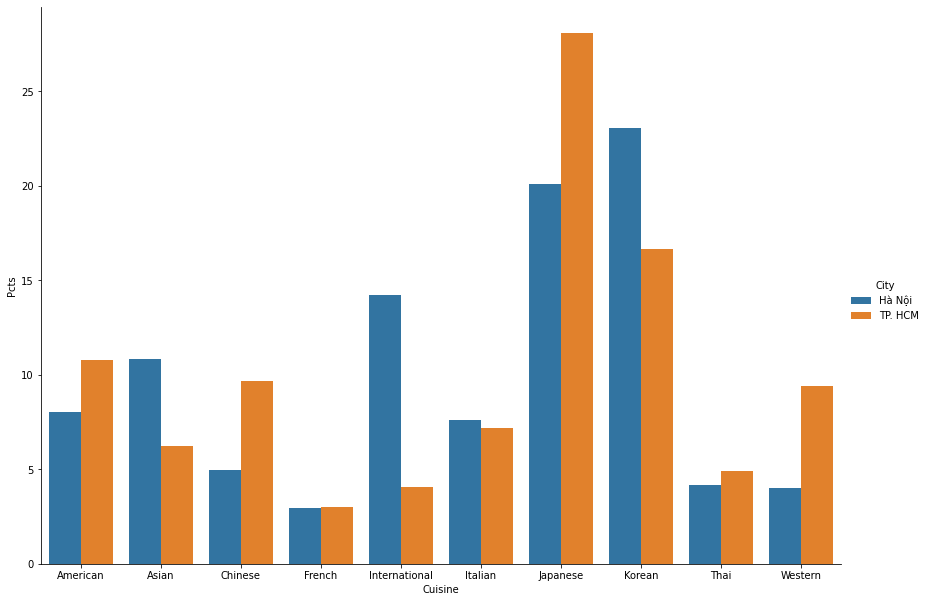

In [29]:
ax = sns.catplot(data = cuisine_pcts.reset_index(), x = 'Cuisine', y = 'Pcts', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)

In [30]:
rating_df = filtered_restaurant_df[['Rating','City','Cuisine']].groupby(by=['City','Cuisine']).mean()
rating_df

Rating
City    Cuisine                
Hà Nội  American       7.246154
        Asian          7.300000
        Chinese        7.315625
        French         7.742105
        International  7.502174
        Italian        7.197959
        Japanese       7.518462
        Korean         7.088591
        Thai           6.703704
        Western        7.296154
TP. HCM American       6.951200
        Asian          7.236111
        Chinese        7.400893
        French         7.440000
        International  7.697872
        Italian        7.466265
        Japanese       7.503077
        Korean         7.204663
        Thai           7.447368
        Western        7.440367

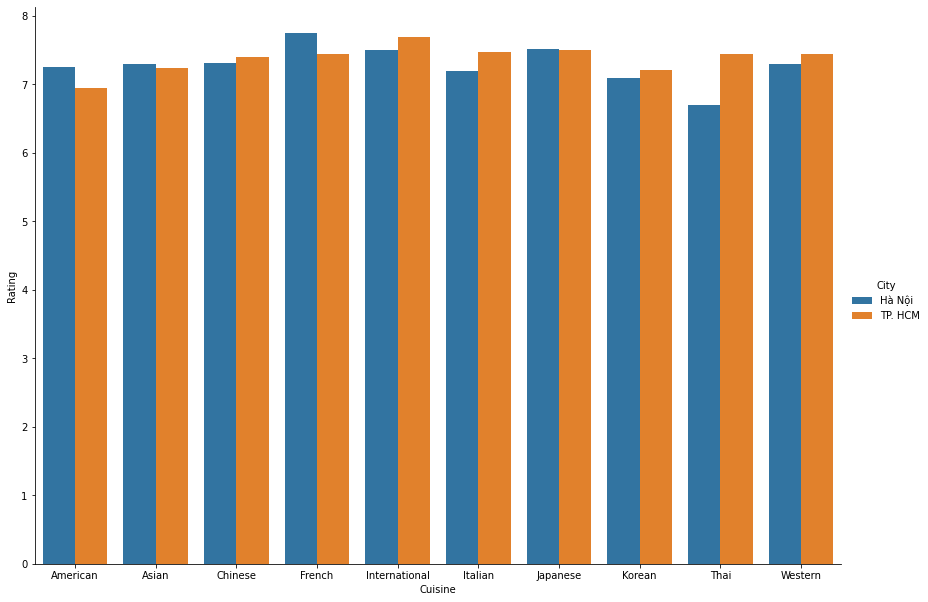

In [31]:
ax = sns.catplot(data = rating_df.reset_index(), x = 'Cuisine', y = 'Rating', hue = 'City', kind = 'bar', height=8.27, aspect=11.7/8.27)

In [34]:
map_df = pd.read_excel('/content/Danh sách cấp tỉnh kèm theo quận huyện, phường xã __Hà Nội_06_03_2021.xls')
map_df

,Tỉnh Thành Phố,Mã TP,Quận Huyện,Mã QH,Phường Xã,Mã PX,Cấp,Tên Tiếng Anh
0,Thành phố Hà Nội,1,Quận Ba Đình,1,Phường Phúc Xá,1,Phường,NaN
1,Thành phố Hà Nội,1,Quận Ba Đình,1,Phường Trúc Bạch,4,Phường,NaN
2,Thành phố Hà Nội,1,Quận Ba Đình,1,Phường Vĩnh Phúc,6,Phường,Vinh Phuc Commune
3,Thành phố Hà Nội,1,Quận Ba Đình,1,Phường Cống Vị,7,Phường,NaN
4,Thành phố Hà Nội,1,Quận Ba Đình,1,Phường Liễu Giai,8,Phường,Lieu Giai Commune
...,...,...,...,...,...,...,...,...
886,Thành phố Hồ Chí Minh,79,Huyện Cần Giờ,787,Xã Tam Thôn Hiệp,27670,Xã,NaN
887,Thành phố Hồ Chí Minh,79,Huyện Cần Giờ,787,Xã An Thới Đông,27673,Xã,NaN
888,Thành phố Hồ Chí Minh,79,Huyện Cần Giờ,787,Xã Thạnh An,27676,Xã,NaN
889,Thành phố Hồ Chí Minh,79,Huyện Cần Giờ,787,Xã Long Hòa,27679,Xã,NaN


In [35]:
pin_df = pd.DataFrame(columns = ['Pin','Latitude','Longitude'])

for i in range(len(map_df)):
    pin = map_df.iloc[i]

    # Because it's hard to find location's latitude and longitude in Vietnam, I have to try many ways to find the best result 
    try:
        name = 'UBND '+pin['Phường Xã']+', '+pin['Quận Huyện']+', '+pin['Tỉnh Thành Phố']
        location = geolocator.geocode(name)
        latitude = location.latitude
        longitude = location.longitude
    except:
        try:
            name = pin['Phường Xã']+', '+pin['Quận Huyện']+', '+pin['Tỉnh Thành Phố']
            location = geolocator.geocode(name)
            latitude = location.latitude
            longitude = location.longitude
        except:
            try:
                name = pin['Quận Huyện']+', '+pin['Tỉnh Thành Phố']
                location = geolocator.geocode(name)
                latitude = location.latitude
                longitude = location.longitude
            except:
                name = "Can't get location"
                location = np.nan
                latitude = np.nan

    pin_df = pin_df.append({'Pin':name,'Latitude':latitude,'Longitude':longitude}, ignore_index=True)               

In [36]:
pin_df.dropna(inplace = True)
pin_df.drop_duplicates(subset=['Latitude','Longitude'],inplace=True)
pin_df

,Pin,Latitude,Longitude
0,"Quận Ba Đình, Thành phố Hà Nội",21.019506,105.816637
11,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",21.030481,105.814172
13,"Phường Thành Công, Quận Ba Đình, Thành phố Hà Nội",21.018132,105.815990
14,"Quận Hoàn Kiếm, Thành phố Hà Nội",21.029450,105.854444
21,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Thành phố H...",21.029284,105.855296
...,...,...,...
886,"Xã Tam Thôn Hiệp, Huyện Cần Giờ, Thành phố Hồ ...",10.599003,106.859054
887,"Xã An Thới Đông, Huyện Cần Giờ, Thành phố Hồ C...",10.592152,106.789672
888,"UBND Xã Thạnh An, Huyện Cần Giờ, Thành phố Hồ ...",10.470680,106.975232
889,"UBND Xã Long Hòa, Huyện Cần Giờ, Thành phố Hồ ...",10.397755,106.911282


In [37]:
hn_pin_df = pin_df[pin_df['Pin'].str.endswith('Thành phố Hà Nội')]
hn_pin_df

,Pin,Latitude,Longitude
0,"Quận Ba Đình, Thành phố Hà Nội",21.019506,105.816637
11,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",21.030481,105.814172
13,"Phường Thành Công, Quận Ba Đình, Thành phố Hà Nội",21.018132,105.815990
14,"Quận Hoàn Kiếm, Thành phố Hà Nội",21.029450,105.854444
21,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Thành phố H...",21.029284,105.855296
...,...,...,...
565,"UBND Xã Hồng Sơn, Huyện Mỹ Đức, Thành phố Hà Nội",20.727681,105.708647
566,"UBND Xã Lê Thanh, Huyện Mỹ Đức, Thành phố Hà Nội",20.718240,105.733470
568,"Xã Phùng Xá, Huyện Mỹ Đức, Thành phố Hà Nội",20.722995,105.767577
573,"UBND Xã Hương Sơn, Huyện Mỹ Đức, Thành phố Hà Nội",20.614231,105.787002


In [38]:
hcmc_pin_df = pin_df[pin_df['Pin'].str.endswith('Thành phố Hồ Chí Minh')]
hcmc_pin_df

,Pin,Latitude,Longitude
579,"Phường Tân Định, Quận 1, Thành phố Hồ Chí Minh",10.793203,106.690203
580,"Phường Đa Kao, Quận 1, Thành phố Hồ Chí Minh",10.788476,106.698318
581,"UBND Phường Bến Nghé, Quận 1, Thành phố Hồ Chí...",10.782615,106.704624
582,"Phường Bến Thành, Quận 1, Thành phố Hồ Chí Minh",10.772866,106.694300
583,"Phường Nguyễn Thái Bình, Quận 1, Thành phố Hồ ...",10.768828,106.698797
...,...,...,...
886,"Xã Tam Thôn Hiệp, Huyện Cần Giờ, Thành phố Hồ ...",10.599003,106.859054
887,"Xã An Thới Đông, Huyện Cần Giờ, Thành phố Hồ C...",10.592152,106.789672
888,"UBND Xã Thạnh An, Huyện Cần Giờ, Thành phố Hồ ...",10.470680,106.975232
889,"UBND Xã Long Hòa, Huyện Cần Giờ, Thành phố Hồ ...",10.397755,106.911282


In [39]:
map_hn = folium.Map(location=[20.984, 105.769], zoom_start=11)

# add markers to map
for lat, lng, pin in zip(hn_pin_df['Latitude'], hn_pin_df['Longitude'], hn_pin_df['Pin']):
    label = pin
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hn)  
    
map_hcmc = folium.Map(location=[10.783, 106.697], zoom_start=11)

# add markers to map
for lat, lng, pin in zip(hcmc_pin_df['Latitude'], hcmc_pin_df['Longitude'], hcmc_pin_df['Pin']):
    label = pin
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hcmc)  
    

In [40]:
map_hn

In [41]:
map_hcmc

In [42]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

def calculate_distance(lat1,lng1,lat2,lng2):
    lat1 = radians(lat1)
    lng1 = radians(lng1)
    lat2 = radians(lat2)
    lng2 = radians(lng2)

    dlat = lat2 - lat1
    dlng = lng2 - lng1
  
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlng / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000

    return distance

In [43]:
calculate_distance(10.781878,106.705055,10.776159,106.705537)

638.2999257098824

In [44]:
filtered_restaurant_df['Nearest pin'] = 0
filtered_restaurant_df['Distance'] = 0
filtered_restaurant_df.reset_index(drop=True,inplace=True)
filtered_restaurant_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,District,City,Rating,Cuisine,Latitude,Longitude,Total Review,Nearest pin,Distance
0,"Grille6 - Salad, Steak & Pasta - Hào Nam",Quận Đống Đa,Hà Nội,7.5,Western,21.028235,105.827683,448,0,0
1,"Botanica - Salad, Steak & Pasta - Thái Phiên",Quận Hai Bà Trưng,Hà Nội,7.4,American,21.010549,105.851308,380,0,0
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",Quận Ba Đình,Hà Nội,7.3,French,21.026040,105.822366,276,0,0
3,Food Court - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.5,International,21.026996,105.898464,442,0,0
4,Gà Rán Popeyes - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.2,American,21.026516,105.900099,84,0,0
...,...,...,...,...,...,...,...,...,...,...
1799,Pou Pizza - Quang Trung,Quận 9,TP. HCM,8.8,Italian,10.836122,106.771735,10,0,0
1800,Dê Ngô Đồng Restaurant,Quận 10,TP. HCM,8.5,Chinese,10.768715,106.668306,10,0,0
1801,Saigon Social Space - Nhà Hàng Á Âu,Quận 2,TP. HCM,8.4,Western,10.763068,106.759421,10,0,0
1802,Stirling Steaks Vietnam - Nguyễn Gia Trí,Quận Bình Thạnh,TP. HCM,8.6,International,10.803256,106.715774,10,0,0


In [45]:
for row in range(len(filtered_restaurant_df)):
    
    min_distance = 1000
    i = ''
    status = 'Not in range'

    lat1 = filtered_restaurant_df.iloc[row]['Latitude']
    lng1 = filtered_restaurant_df.iloc[row]['Longitude']


    for pin in range(len(pin_df)):
        lat2 = pin_df.iloc[pin]['Latitude']
        lng2 = pin_df.iloc[pin]['Longitude']

        distance = calculate_distance(lat1,lng1,lat2,lng2)

        if distance < min_distance:
            status = 'In range of a pin'
            i = i + (pin_df.iloc[pin]['Pin']) +';'

    filtered_restaurant_df.loc[row,'Nearest pin'] = str(i)
    filtered_restaurant_df.loc[row,'Distance'] = status      

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [46]:
filtered_restaurant_df

,Name,District,City,Rating,Cuisine,Latitude,Longitude,Total Review,Nearest pin,Distance
0,"Grille6 - Salad, Steak & Pasta - Hào Nam",Quận Đống Đa,Hà Nội,7.5,Western,21.028235,105.827683,448,,Not in range
1,"Botanica - Salad, Steak & Pasta - Thái Phiên",Quận Hai Bà Trưng,Hà Nội,7.4,American,21.010549,105.851308,380,,Not in range
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",Quận Ba Đình,Hà Nội,7.3,French,21.026040,105.822366,276,"Quận Ba Đình, Thành phố Hà Nội;Phường Kim Mã, ...",In range of a pin
3,Food Court - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.5,International,21.026996,105.898464,442,,Not in range
4,Gà Rán Popeyes - AEON Mall Long Biên,Quận Long Biên,Hà Nội,7.2,American,21.026516,105.900099,84,,Not in range
...,...,...,...,...,...,...,...,...,...,...
1799,Pou Pizza - Quang Trung,Quận 9,TP. HCM,8.8,Italian,10.836122,106.771735,10,,Not in range
1800,Dê Ngô Đồng Restaurant,Quận 10,TP. HCM,8.5,Chinese,10.768715,106.668306,10,"Phường 09, Quận 10, Thành phố Hồ Chí Minh;",In range of a pin
1801,Saigon Social Space - Nhà Hàng Á Âu,Quận 2,TP. HCM,8.4,Western,10.763068,106.759421,10,"Phường Thạnh Mỹ Lợi, Thành phố Thủ Đức, Thành ...",In range of a pin
1802,Stirling Steaks Vietnam - Nguyễn Gia Trí,Quận Bình Thạnh,TP. HCM,8.6,International,10.803256,106.715774,10,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí M...",In range of a pin


In [47]:
search_pin = filtered_restaurant_df[filtered_restaurant_df['Distance'] != 'Not in range']
search_pin

,Name,District,City,Rating,Cuisine,Latitude,Longitude,Total Review,Nearest pin,Distance
2,"Botanica - Salad, Steak & Pasta - Giảng Võ",Quận Ba Đình,Hà Nội,7.3,French,21.026040,105.822366,276,"Quận Ba Đình, Thành phố Hà Nội;Phường Kim Mã, ...",In range of a pin
6,Cowboy Jack's Saloon American Dining - Mipec T...,Quận Đống Đa,Hà Nội,7.5,American,21.004487,105.821946,212,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",In range of a pin
7,Cowboy Jack's Saloon American Dining - Vincom ...,Quận Đống Đa,Hà Nội,8.0,American,21.022968,105.809715,128,"Quận Ba Đình, Thành phố Hà Nội;Phường Kim Mã, ...",In range of a pin
9,Cowboy Jack's Saloon American Dining - Sunrise...,Quận Cầu Giấy,Hà Nội,8.0,American,21.030623,105.787966,98,"Quận Cầu Giấy, Thành phố Hà Nội;Phường Mỹ Đình...",In range of a pin
13,Gimbab Hàn Quốc - Ngọc Khánh,Quận Ba Đình,Hà Nội,6.7,Korean,21.028991,105.817394,243,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội;",In range of a pin
...,...,...,...,...,...,...,...,...,...,...
1796,Nicky BT & HBG - Beefsteak & Hamburger - AEON ...,Quận Tân Phú,TP. HCM,5.8,Western,10.802582,106.620439,10,"Phường Sơn Kỳ, Quận Tân Phú, Thành phố Hồ Chí ...",In range of a pin
1798,Nhà Hàng Phú Nhị Đại,Quận Bình Tân,TP. HCM,7.5,Chinese,10.751531,106.616624,10,"UBND Phường An Lạc A, Quận Bình Tân, Thành phố...",In range of a pin
1800,Dê Ngô Đồng Restaurant,Quận 10,TP. HCM,8.5,Chinese,10.768715,106.668306,10,"Phường 09, Quận 10, Thành phố Hồ Chí Minh;",In range of a pin
1801,Saigon Social Space - Nhà Hàng Á Âu,Quận 2,TP. HCM,8.4,Western,10.763068,106.759421,10,"Phường Thạnh Mỹ Lợi, Thành phố Thủ Đức, Thành ...",In range of a pin


In [48]:
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(';')))

# calculate lengths of splits
lens = filtered_restaurant_df['Nearest pin'].str.split(';').map(len)

# create new dataframe, repeating or chaining as appropriate
search_pin = pd.DataFrame({'Cuisine': np.repeat(filtered_restaurant_df['Cuisine'], lens),
                           'Rating': np.repeat(filtered_restaurant_df['Rating'], lens),
                           'Nearest pin': chainer(filtered_restaurant_df['Nearest pin']),
                           })

search_pin.replace('',np.nan, inplace = True)
search_pin.dropna(inplace = True)
search_pin

,Cuisine,Rating,Nearest pin
2,French,7.3,"Quận Ba Đình, Thành phố Hà Nội"
2,French,7.3,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội"
6,American,7.5,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố..."
7,American,8.0,"Quận Ba Đình, Thành phố Hà Nội"
7,American,8.0,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội"
...,...,...,...
1796,Western,5.8,"Phường Tân Quý, Quận Tân Phú, Thành phố Hồ Chí..."
1798,Chinese,7.5,"UBND Phường An Lạc A, Quận Bình Tân, Thành phố..."
1800,Chinese,8.5,"Phường 09, Quận 10, Thành phố Hồ Chí Minh"
1801,Western,8.4,"Phường Thạnh Mỹ Lợi, Thành phố Thủ Đức, Thành ..."


In [49]:
number_of_venues = search_pin['Nearest pin'].value_counts()
minor_post = number_of_venues[number_of_venues < 10].index.to_list()
search_pin.set_index(['Nearest pin'], inplace = True)
search_pin.drop(minor_post, inplace = True)
search_pin.reset_index(inplace = True)
search_pin

,Nearest pin,Cuisine,Rating
0,"Quận Ba Đình, Thành phố Hà Nội",French,7.3
1,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",French,7.3
2,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",American,7.5
3,"Quận Ba Đình, Thành phố Hà Nội",American,8.0
4,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",American,8.0
...,...,...,...
2507,"UBND Phường 12, Quận 3, Thành phố Hồ Chí Minh",International,7.5
2508,"Phường Sơn Kỳ, Quận Tân Phú, Thành phố Hồ Chí ...",Western,5.8
2509,"Phường Tân Quý, Quận Tân Phú, Thành phố Hồ Chí...",Western,5.8
2510,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",Chinese,8.5


In [50]:
restaurant_dummy = pd.get_dummies(search_pin[['Cuisine']], prefix="", prefix_sep="")
restaurant_dummy['Nearest pin'] = search_pin['Nearest pin']
fixed_columns = [restaurant_dummy.columns[-1]] + list(restaurant_dummy.columns[:-1])
restaurant_dummy = restaurant_dummy[fixed_columns]
restaurant_dummy

,Nearest pin,American,Asian,Chinese,French,International,Italian,Japanese,Korean,Thai,Western
0,"Quận Ba Đình, Thành phố Hà Nội",0,0,0,1,0,0,0,0,0,0
1,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",0,0,0,1,0,0,0,0,0,0
2,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",1,0,0,0,0,0,0,0,0,0
3,"Quận Ba Đình, Thành phố Hà Nội",1,0,0,0,0,0,0,0,0,0
4,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2507,"UBND Phường 12, Quận 3, Thành phố Hồ Chí Minh",0,0,0,0,1,0,0,0,0,0
2508,"Phường Sơn Kỳ, Quận Tân Phú, Thành phố Hồ Chí ...",0,0,0,0,0,0,0,0,0,1
2509,"Phường Tân Quý, Quận Tân Phú, Thành phố Hồ Chí...",0,0,0,0,0,0,0,0,0,1
2510,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",0,0,1,0,0,0,0,0,0,0


In [51]:
restaurant_grouped = restaurant_dummy.groupby('Nearest pin').mean().reset_index()
restaurant_grouped

,Nearest pin,American,Asian,Chinese,French,International,Italian,Japanese,Korean,Thai,Western
0,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí Minh",0.250000,0.062500,0.000000,0.000000,0.125000,0.062500,0.312500,0.125000,0.062500,0.000000
1,"Phường 01, Quận Gò Vấp, Thành phố Hồ Chí Minh",0.363636,0.090909,0.000000,0.000000,0.000000,0.000000,0.272727,0.272727,0.000000,0.000000
2,"Phường 01, Quận Phú Nhuận, Thành phố Hồ Chí Minh",0.055556,0.055556,0.222222,0.000000,0.000000,0.111111,0.277778,0.111111,0.055556,0.111111
3,"Phường 01, Quận Tân Bình, Thành phố Hồ Chí Minh",0.227273,0.181818,0.090909,0.000000,0.000000,0.136364,0.090909,0.227273,0.000000,0.045455
4,"Phường 04, Quận 5, Thành phố Hồ Chí Minh",0.052632,0.026316,0.421053,0.000000,0.026316,0.105263,0.105263,0.184211,0.026316,0.052632
5,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",0.100000,0.060000,0.160000,0.000000,0.000000,0.040000,0.240000,0.260000,0.040000,0.100000
6,"Phường 09, Quận 3, Thành phố Hồ Chí Minh",0.027778,0.041667,0.138889,0.083333,0.055556,0.027778,0.347222,0.166667,0.000000,0.111111
7,"Phường 09, Quận 4, Thành phố Hồ Chí Minh",0.000000,0.000000,0.100000,0.000000,0.100000,0.100000,0.100000,0.200000,0.300000,0.100000
8,"Phường 15, Quận 10, Thành phố Hồ Chí Minh",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.500000
9,"Phường 15, Quận 11, Thành phố Hồ Chí Minh",0.181818,0.000000,0.045455,0.045455,0.045455,0.090909,0.136364,0.181818,0.045455,0.227273


In [52]:
restaurant_pivot_rating = pd.pivot_table(search_pin, values = 'Rating', index = 'Nearest pin', columns = 'Cuisine', aggfunc= 'mean', fill_value = 0)
restaurant_pivot_rating.reset_index(inplace = True)
restaurant_pivot_rating

Cuisine,Nearest pin,American,Asian,Chinese,French,International,Italian,Japanese,Korean,Thai,Western
0,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí Minh",6.775000,5.900000,0.000000,0.000000,8.000000,7.600000,6.940000,5.600000,5.700000,0.000000
1,"Phường 01, Quận Gò Vấp, Thành phố Hồ Chí Minh",6.475000,8.300000,0.000000,0.000000,0.000000,0.000000,7.066667,6.533333,0.000000,0.000000
2,"Phường 01, Quận Phú Nhuận, Thành phố Hồ Chí Minh",6.000000,6.900000,7.500000,0.000000,0.000000,7.300000,7.720000,6.900000,8.600000,7.600000
3,"Phường 01, Quận Tân Bình, Thành phố Hồ Chí Minh",6.640000,7.275000,7.400000,0.000000,0.000000,6.933333,6.850000,7.320000,0.000000,6.800000
4,"Phường 04, Quận 5, Thành phố Hồ Chí Minh",6.300000,8.100000,7.175000,0.000000,7.200000,7.200000,8.200000,7.028571,7.600000,7.400000
5,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",6.540000,7.233333,7.250000,0.000000,0.000000,8.000000,7.300000,7.046154,6.950000,7.360000
6,"Phường 09, Quận 3, Thành phố Hồ Chí Minh",7.400000,7.366667,7.520000,7.683333,7.950000,7.650000,7.636000,7.333333,0.000000,7.475000
7,"Phường 09, Quận 4, Thành phố Hồ Chí Minh",0.000000,0.000000,7.100000,0.000000,7.200000,7.300000,7.800000,7.950000,7.333333,7.100000
8,"Phường 15, Quận 10, Thành phố Hồ Chí Minh",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000,7.466667,0.000000,7.600000
9,"Phường 15, Quận 11, Thành phố Hồ Chí Minh",7.850000,0.000000,8.500000,7.200000,7.900000,6.900000,7.933333,6.575000,7.800000,8.060000


In [53]:
restaurant_merged = restaurant_grouped.merge(restaurant_pivot_rating, on = 'Nearest pin', suffixes=('_percent', '_avgRating'))
restaurant_merged

,Nearest pin,American_percent,Asian_percent,Chinese_percent,French_percent,International_percent,Italian_percent,Japanese_percent,Korean_percent,Thai_percent,Western_percent,American_avgRating,Asian_avgRating,Chinese_avgRating,French_avgRating,International_avgRating,Italian_avgRating,Japanese_avgRating,Korean_avgRating,Thai_avgRating,Western_avgRating
0,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí Minh",0.250000,0.062500,0.000000,0.000000,0.125000,0.062500,0.312500,0.125000,0.062500,0.000000,6.775000,5.900000,0.000000,0.000000,8.000000,7.600000,6.940000,5.600000,5.700000,0.000000
1,"Phường 01, Quận Gò Vấp, Thành phố Hồ Chí Minh",0.363636,0.090909,0.000000,0.000000,0.000000,0.000000,0.272727,0.272727,0.000000,0.000000,6.475000,8.300000,0.000000,0.000000,0.000000,0.000000,7.066667,6.533333,0.000000,0.000000
2,"Phường 01, Quận Phú Nhuận, Thành phố Hồ Chí Minh",0.055556,0.055556,0.222222,0.000000,0.000000,0.111111,0.277778,0.111111,0.055556,0.111111,6.000000,6.900000,7.500000,0.000000,0.000000,7.300000,7.720000,6.900000,8.600000,7.600000
3,"Phường 01, Quận Tân Bình, Thành phố Hồ Chí Minh",0.227273,0.181818,0.090909,0.000000,0.000000,0.136364,0.090909,0.227273,0.000000,0.045455,6.640000,7.275000,7.400000,0.000000,0.000000,6.933333,6.850000,7.320000,0.000000,6.800000
4,"Phường 04, Quận 5, Thành phố Hồ Chí Minh",0.052632,0.026316,0.421053,0.000000,0.026316,0.105263,0.105263,0.184211,0.026316,0.052632,6.300000,8.100000,7.175000,0.000000,7.200000,7.200000,8.200000,7.028571,7.600000,7.400000
5,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",0.100000,0.060000,0.160000,0.000000,0.000000,0.040000,0.240000,0.260000,0.040000,0.100000,6.540000,7.233333,7.250000,0.000000,0.000000,8.000000,7.300000,7.046154,6.950000,7.360000
6,"Phường 09, Quận 3, Thành phố Hồ Chí Minh",0.027778,0.041667,0.138889,0.083333,0.055556,0.027778,0.347222,0.166667,0.000000,0.111111,7.400000,7.366667,7.520000,7.683333,7.950000,7.650000,7.636000,7.333333,0.000000,7.475000
7,"Phường 09, Quận 4, Thành phố Hồ Chí Minh",0.000000,0.000000,0.100000,0.000000,0.100000,0.100000,0.100000,0.200000,0.300000,0.100000,0.000000,0.000000,7.100000,0.000000,7.200000,7.300000,7.800000,7.950000,7.333333,7.100000
8,"Phường 15, Quận 10, Thành phố Hồ Chí Minh",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000,7.466667,0.000000,7.600000
9,"Phường 15, Quận 11, Thành phố Hồ Chí Minh",0.181818,0.000000,0.045455,0.045455,0.045455,0.090909,0.136364,0.181818,0.045455,0.227273,7.850000,0.000000,8.500000,7.200000,7.900000,6.900000,7.933333,6.575000,7.800000,8.060000


In [69]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:11]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [70]:
def return_most_rating_venues(row, num_top_venues):
    row_categories = row.iloc[11:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [71]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Nearest pin']



for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Rating Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Rating Venue'.format(ind+1))

# create a new dataframe
restaurant_cuisine_sorted = pd.DataFrame(columns=columns)
restaurant_cuisine_sorted['Nearest pin'] = restaurant_merged['Nearest pin']

for ind in np.arange(restaurant_merged.shape[0]):
    restaurant_cuisine_sorted.iloc[ind, 1:6] = return_most_common_venues(restaurant_merged.iloc[ind, :], num_top_venues)
    restaurant_cuisine_sorted.iloc[ind, 6:] = return_most_rating_venues(restaurant_merged.iloc[ind, :], num_top_venues)

restaurant_cuisine_sorted.replace('_percent','', regex = True, inplace = True)
restaurant_cuisine_sorted.replace('_avgRating','', regex = True, inplace = True)
restaurant_cuisine_sorted

,Nearest pin,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
0,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí Minh",Japanese,American,Korean,International,Thai,International,Italian,Japanese,American,Asian
1,"Phường 01, Quận Gò Vấp, Thành phố Hồ Chí Minh",American,Korean,Japanese,Asian,Western,Asian,Japanese,Korean,American,Western
2,"Phường 01, Quận Phú Nhuận, Thành phố Hồ Chí Minh",Japanese,Chinese,Western,Korean,Italian,Thai,Japanese,Western,Chinese,Italian
3,"Phường 01, Quận Tân Bình, Thành phố Hồ Chí Minh",Korean,American,Asian,Italian,Japanese,Chinese,Korean,Asian,Italian,Japanese
4,"Phường 04, Quận 5, Thành phố Hồ Chí Minh",Chinese,Korean,Japanese,Italian,Western,Japanese,Asian,Thai,Western,International
5,"Phường 09, Quận 10, Thành phố Hồ Chí Minh",Korean,Japanese,Chinese,Western,American,Italian,Western,Japanese,Chinese,Asian
6,"Phường 09, Quận 3, Thành phố Hồ Chí Minh",Japanese,Korean,Chinese,Western,French,International,French,Italian,Japanese,Chinese
7,"Phường 09, Quận 4, Thành phố Hồ Chí Minh",Thai,Korean,Western,Japanese,Italian,Korean,Japanese,Thai,Italian,International
8,"Phường 15, Quận 10, Thành phố Hồ Chí Minh",Western,Korean,Japanese,Thai,Italian,Western,Korean,Japanese,Thai,Italian
9,"Phường 15, Quận 11, Thành phố Hồ Chí Minh",Western,Korean,American,Japanese,Italian,Chinese,Western,Japanese,International,American


In [72]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

restaurant_grouped_clustering = restaurant_merged.drop('Nearest pin', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(restaurant_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 3, 0, 3, 3, 2, 3, 1, 2], dtype=int32)

In [73]:
# add clustering labels
restaurant_cuisine_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [74]:
restaurant_cluster = pin_df

# merge restaurant_cuisine_sorted with pin_df to add latitude/longitude for each neighborhood
restaurant_cluster = restaurant_cluster.join(restaurant_cuisine_sorted.set_index('Nearest pin'), on='Pin')
restaurant_cluster.dropna(inplace=True)
restaurant_cluster.reset_index(drop=True,inplace=True)
restaurant_cluster

,Pin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
0,"Quận Ba Đình, Thành phố Hà Nội",21.019506,105.816637,2.0,Japanese,Korean,Asian,Thai,International,American,Japanese,French,Western,Chinese
1,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",21.030481,105.814172,2.0,Japanese,Korean,International,Asian,Thai,Asian,Chinese,Japanese,French,International
2,"Phường Thành Công, Quận Ba Đình, Thành phố Hà Nội",21.018132,105.815990,3.0,Japanese,Korean,Asian,International,Thai,American,Japanese,Western,Chinese,Italian
3,"Quận Hoàn Kiếm, Thành phố Hà Nội",21.029450,105.854444,2.0,International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
4,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Thành phố H...",21.029284,105.855296,2.0,International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
5,"Phường Hàng Bông, Quận Hoàn Kiếm, Thành phố Hà...",21.029512,105.846051,2.0,International,Korean,Italian,Asian,American,French,American,Japanese,International,Italian
6,"Quận Cầu Giấy, Thành phố Hà Nội",21.031168,105.796629,1.0,Korean,Japanese,Western,International,Italian,International,American,Japanese,Italian,Korean
7,"UBND Phường Mai Dịch, Quận Cầu Giấy, Thành phố...",21.035835,105.778600,1.0,Korean,Japanese,International,Western,Thai,International,Korean,Japanese,Western,American
8,"UBND Phường Kim Liên, Quận Đống Đa, Thành phố ...",21.005713,105.835739,1.0,Korean,Japanese,International,Asian,Thai,American,French,Japanese,International,Korean
9,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",21.003905,105.820844,3.0,Korean,International,Japanese,Thai,Italian,Chinese,International,American,Japanese,Western


In [75]:
hn_restaurant_cluster = restaurant_cluster[restaurant_cluster['Pin'].str.endswith('Thành phố Hà Nội')]
hn_restaurant_cluster

,Pin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
0,"Quận Ba Đình, Thành phố Hà Nội",21.019506,105.816637,2.0,Japanese,Korean,Asian,Thai,International,American,Japanese,French,Western,Chinese
1,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",21.030481,105.814172,2.0,Japanese,Korean,International,Asian,Thai,Asian,Chinese,Japanese,French,International
2,"Phường Thành Công, Quận Ba Đình, Thành phố Hà Nội",21.018132,105.815990,3.0,Japanese,Korean,Asian,International,Thai,American,Japanese,Western,Chinese,Italian
3,"Quận Hoàn Kiếm, Thành phố Hà Nội",21.029450,105.854444,2.0,International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
4,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Thành phố H...",21.029284,105.855296,2.0,International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
5,"Phường Hàng Bông, Quận Hoàn Kiếm, Thành phố Hà...",21.029512,105.846051,2.0,International,Korean,Italian,Asian,American,French,American,Japanese,International,Italian
6,"Quận Cầu Giấy, Thành phố Hà Nội",21.031168,105.796629,1.0,Korean,Japanese,Western,International,Italian,International,American,Japanese,Italian,Korean
7,"UBND Phường Mai Dịch, Quận Cầu Giấy, Thành phố...",21.035835,105.778600,1.0,Korean,Japanese,International,Western,Thai,International,Korean,Japanese,Western,American
8,"UBND Phường Kim Liên, Quận Đống Đa, Thành phố ...",21.005713,105.835739,1.0,Korean,Japanese,International,Asian,Thai,American,French,Japanese,International,Korean
9,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",21.003905,105.820844,3.0,Korean,International,Japanese,Thai,Italian,Chinese,International,American,Japanese,Western


In [76]:
hcmc_restaurant_cluster = restaurant_cluster[restaurant_cluster['Pin'].str.endswith('Thành phố Hồ Chí Minh')]
hcmc_restaurant_cluster

,Pin,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
13,"Phường Tân Định, Quận 1, Thành phố Hồ Chí Minh",10.793203,106.690203,2.0,Japanese,Korean,French,American,Western,International,Chinese,American,Western,Japanese
14,"Phường Đa Kao, Quận 1, Thành phố Hồ Chí Minh",10.788476,106.698318,2.0,Japanese,Western,Korean,American,Asian,International,Western,Thai,Japanese,American
15,"UBND Phường Bến Nghé, Quận 1, Thành phố Hồ Chí...",10.782615,106.704624,2.0,Japanese,Western,Thai,Chinese,American,Italian,International,Western,Chinese,Japanese
16,"Phường Bến Thành, Quận 1, Thành phố Hồ Chí Minh",10.772866,106.694300,2.0,Japanese,Western,Chinese,American,Korean,International,Japanese,French,Italian,Western
17,"Phường Nguyễn Thái Bình, Quận 1, Thành phố Hồ ...",10.768828,106.698797,2.0,Japanese,Western,American,Korean,International,Italian,International,French,Japanese,Korean
18,"Phường Phạm Ngũ Lão, Quận 1, Thành phố Hồ Chí ...",10.766961,106.692112,2.0,Japanese,Western,Chinese,International,American,Western,International,Japanese,Asian,Italian
19,"UBND Phường Cầu Ông Lãnh, Quận 1, Thành phố Hồ...",10.765552,106.697129,2.0,Japanese,Western,American,Chinese,Korean,Japanese,International,French,Asian,Western
20,"Phường Cô Giang, Quận 1, Thành phố Hồ Chí Minh",10.762010,106.693365,2.0,Japanese,Western,American,Chinese,International,Asian,Japanese,Western,International,Chinese
21,"Phường Nguyễn Cư Trinh, Quận 1, Thành phố Hồ C...",10.762413,106.686636,2.0,Japanese,Western,Chinese,Asian,American,Thai,Asian,Japanese,Western,Chinese
22,"Phường Cầu Kho, Quận 1, Thành phố Hồ Chí Minh",10.757525,106.688900,2.0,Japanese,Western,Asian,American,International,Japanese,Asian,French,International,Western


In [77]:
# create map
hn_map_clusters = folium.Map(location=[20.984, 105.869], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.cool(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hn_restaurant_cluster['Latitude'], hn_restaurant_cluster['Longitude'], hn_restaurant_cluster['Pin'], hn_restaurant_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.9).add_to(hn_map_clusters)
       
# create map
hcmc_map_clusters = folium.Map(location=[10.783, 106.697], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.cool(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hcmc_restaurant_cluster['Latitude'], hcmc_restaurant_cluster['Longitude'], hcmc_restaurant_cluster['Pin'], hcmc_restaurant_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.9).add_to(hcmc_map_clusters)
       

In [84]:
hn_map_clusters

In [85]:
hcmc_map_clusters

In [80]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 0, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

,Pin,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
23,"UBND Phường 13, Quận Gò Vấp, Thành phố Hồ Chí ...",Japanese,Korean,American,Italian,Asian,Asian,Japanese,American,Korean,Italian
24,"Phường 01, Quận Gò Vấp, Thành phố Hồ Chí Minh",American,Korean,Japanese,Asian,Western,Asian,Japanese,Korean,American,Western
27,"Phường 01, Quận Tân Bình, Thành phố Hồ Chí Minh",Korean,American,Asian,Italian,Japanese,Chinese,Korean,Asian,Italian,Japanese
34,"UBND Phường Linh Chiểu, Thành phố Thủ Đức, Thà...",Korean,Japanese,Thai,Italian,Chinese,Chinese,Asian,Thai,Italian,American
35,"Phường Bình Thọ, Thành phố Thủ Đức, Thành phố ...",Korean,Japanese,Thai,Asian,Chinese,Chinese,Thai,Asian,Korean,Japanese
36,"Phường Hiệp Phú, Thành phố Thủ Đức, Thành phố ...",Japanese,Korean,Asian,American,Thai,Thai,Asian,Chinese,Italian,Korean
37,"Phường Tăng Nhơn Phú A, Thành phố Thủ Đức, Thà...",Japanese,Asian,American,Korean,Italian,Asian,Korean,Chinese,Italian,Japanese
47,"UBND Phường 13, Quận 11, Thành phố Hồ Chí Minh",Korean,Japanese,Italian,French,Chinese,Italian,French,Chinese,Korean,American
48,"Phường 16, Quận 11, Thành phố Hồ Chí Minh",Chinese,Korean,Italian,Western,Japanese,Japanese,Korean,Italian,Chinese,Asian
51,"Phường Tân Quy, Quận 7, Thành phố Hồ Chí Minh",Korean,Japanese,American,Thai,Italian,Thai,French,Italian,Asian,Korean


In [81]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 1, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

,Pin,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
6,"Quận Cầu Giấy, Thành phố Hà Nội",Korean,Japanese,Western,International,Italian,International,American,Japanese,Italian,Korean
7,"UBND Phường Mai Dịch, Quận Cầu Giấy, Thành phố...",Korean,Japanese,International,Western,Thai,International,Korean,Japanese,Western,American
8,"UBND Phường Kim Liên, Quận Đống Đa, Thành phố ...",Korean,Japanese,International,Asian,Thai,American,French,Japanese,International,Korean
10,"Quận Hai Bà Trưng, Thành phố Hà Nội",Japanese,Korean,Italian,Thai,International,Asian,Western,Japanese,Italian,American
11,"Phường Thượng Đình, Quận Thanh Xuân, Thành phố...",Korean,International,Italian,Thai,Japanese,Japanese,International,Italian,Western,Korean
12,"Phường Mỹ Đình 2, Quận Nam Từ Liêm, Thành phố ...",Japanese,International,Korean,Asian,Western,International,American,Asian,Western,Japanese
25,"Phường 01, Quận Bình Thạnh, Thành phố Hồ Chí Minh",Japanese,American,Korean,International,Thai,International,Italian,Japanese,American,Asian
28,"Phường Tân Sơn Nhì, Quận Tân Phú, Thành phố Hồ...",Korean,Japanese,Italian,American,Western,International,Italian,Western,Japanese,Korean
38,"Phường Thảo Điền, Thành phố Thủ Đức, Thành phố...",Japanese,Italian,American,Western,Thai,Japanese,Italian,French,Western,American
43,"Phường 15, Quận 10, Thành phố Hồ Chí Minh",Western,Korean,Japanese,Thai,Italian,Western,Korean,Japanese,Thai,Italian


In [82]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 2, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

,Pin,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
0,"Quận Ba Đình, Thành phố Hà Nội",Japanese,Korean,Asian,Thai,International,American,Japanese,French,Western,Chinese
1,"Phường Kim Mã, Quận Ba Đình, Thành phố Hà Nội",Japanese,Korean,International,Asian,Thai,Asian,Chinese,Japanese,French,International
3,"Quận Hoàn Kiếm, Thành phố Hà Nội",International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
4,"Phường Lý Thái Tổ, Quận Hoàn Kiếm, Thành phố H...",International,Italian,Korean,Japanese,American,American,Japanese,International,Italian,French
5,"Phường Hàng Bông, Quận Hoàn Kiếm, Thành phố Hà...",International,Korean,Italian,Asian,American,French,American,Japanese,International,Italian
13,"Phường Tân Định, Quận 1, Thành phố Hồ Chí Minh",Japanese,Korean,French,American,Western,International,Chinese,American,Western,Japanese
14,"Phường Đa Kao, Quận 1, Thành phố Hồ Chí Minh",Japanese,Western,Korean,American,Asian,International,Western,Thai,Japanese,American
15,"UBND Phường Bến Nghé, Quận 1, Thành phố Hồ Chí...",Japanese,Western,Thai,Chinese,American,Italian,International,Western,Chinese,Japanese
16,"Phường Bến Thành, Quận 1, Thành phố Hồ Chí Minh",Japanese,Western,Chinese,American,Korean,International,Japanese,French,Italian,Western
17,"Phường Nguyễn Thái Bình, Quận 1, Thành phố Hồ ...",Japanese,Western,American,Korean,International,Italian,International,French,Japanese,Korean


In [83]:
restaurant_cluster.loc[restaurant_cluster['Cluster Labels'] == 3, restaurant_cluster.columns[[0] + list(range(4, restaurant_cluster.shape[1]))]]

,Pin,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,1st Most Rating Venue,2nd Most Rating Venue,3rd Most Rating Venue,4th Most Rating Venue,5th Most Rating Venue
2,"Phường Thành Công, Quận Ba Đình, Thành phố Hà Nội",Japanese,Korean,Asian,International,Thai,American,Japanese,Western,Chinese,Italian
9,"UBND Phường Ngã Tư Sở, Quận Đống Đa, Thành phố...",Korean,International,Japanese,Thai,Italian,Chinese,International,American,Japanese,Western
26,"UBND Phường 02, Quận Tân Bình, Thành phố Hồ Ch...",Korean,Japanese,Thai,Chinese,American,Japanese,International,Chinese,Asian,Korean
29,"Phường Sơn Kỳ, Quận Tân Phú, Thành phố Hồ Chí ...",Japanese,Western,Thai,Korean,Chinese,Chinese,Korean,Japanese,Western,American
30,"Phường Tân Quý, Quận Tân Phú, Thành phố Hồ Chí...",Japanese,Western,Korean,Thai,Italian,Italian,Chinese,Japanese,Western,American
31,"Phường Tân Thành, Quận Tân Phú, Thành phố Hồ C...",Japanese,Korean,International,Western,Italian,Italian,Japanese,Chinese,Western,International
33,"Phường 01, Quận Phú Nhuận, Thành phố Hồ Chí Minh",Japanese,Chinese,Western,Korean,Italian,Thai,Japanese,Western,Chinese,Italian
39,"UBND Phường 12, Quận 3, Thành phố Hồ Chí Minh",Japanese,Korean,American,Western,Chinese,International,Italian,Japanese,American,Korean
40,"UBND Phường 13, Quận 3, Thành phố Hồ Chí Minh",Korean,Japanese,Western,Thai,Chinese,Italian,Chinese,Korean,Japanese,American
44,"UBND Phường 10, Quận 10, Thành phố Hồ Chí Minh",Thai,Japanese,Korean,Western,Italian,Japanese,Korean,Thai,Italian,International
